<a href="https://colab.research.google.com/github/mehdy28/Financial_crisis_analysis_and_prediction/blob/main/financial_crisis_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class='alert alert-block alert-info'><h2>Financial Crisis in Africa</h2> </div>

In [ ]:
#Importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
#Loeading the data into a dataframe 
url= 'https://raw.githubusercontent.com/mehdy28/Financial_crisis_analysis_and_prediction/main/data/african_crises.csv'
data= pd.read_csv(url)
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
data.shape

(1059, 14)

In [ ]:
data.isnull().sum()

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

We do have no null values

In [ ]:
data.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [ ]:
data.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


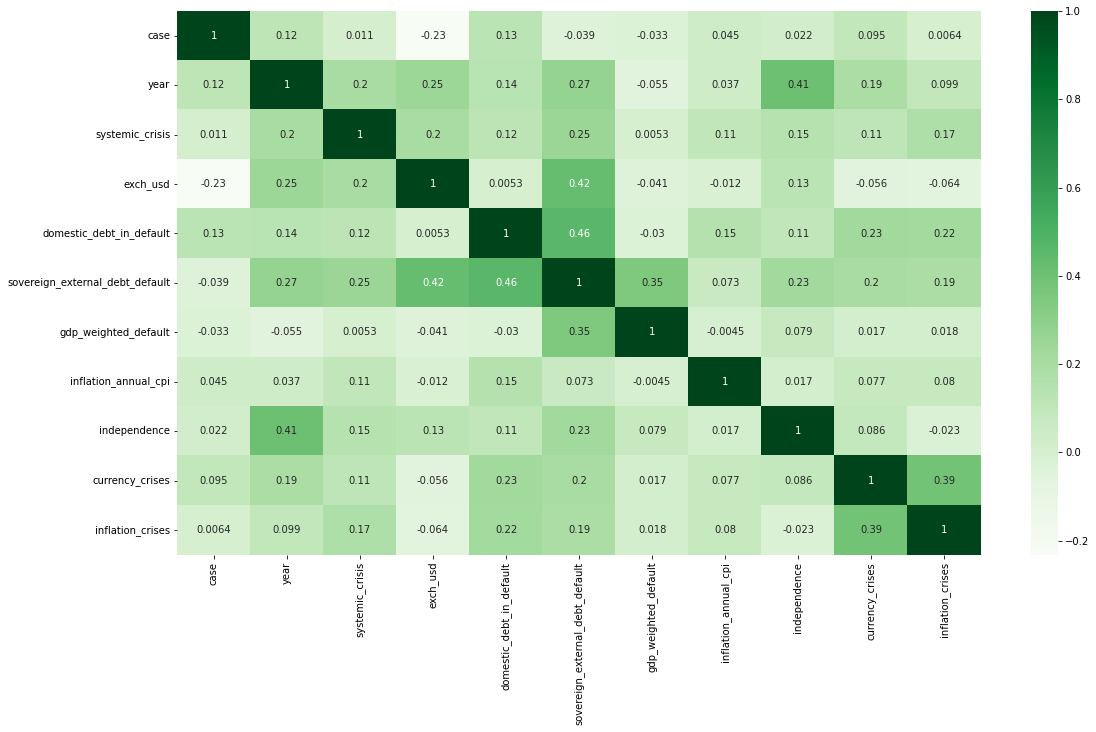

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
countries =data.country.unique()

In [ ]:
m = []
for i in countries:
  m.append(i)

In [ ]:
m

['Algeria',
 'Angola',
 'Central African Republic',
 'Ivory Coast',
 'Egypt',
 'Kenya',
 'Mauritius',
 'Morocco',
 'Nigeria',
 'South Africa',
 'Tunisia',
 'Zambia',
 'Zimbabwe']

TypeError: ignored

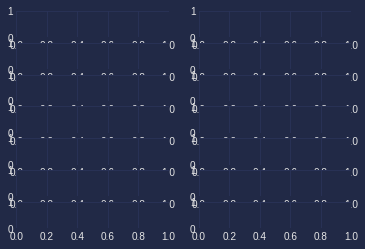

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk
countries =data.country.unique()
plt.style.use('cyberpunk')
fig, axs = plt.subplots(round(data.country.nunique() /2)+1, 2)
i = 0
while i < round(data.country.nunique() /2)+1:
  axs[i, 0].plot(data.loc[data.country==m(i)].year,data.loc[data.country==m(i)].inflation_annual_cpi, marker = 'o')
  axs[0, 0].set_title(m(i))
  axs[i, 1].plot(data.loc[data.country==m(i+1)].year,data.loc[data.country==m(i+1)].inflation_annual_cpi, marker = 'o')
  axs[0, 1].set_title(m(i+1))
  i+=2;
fig.tight_layout()

In [ ]:
df = pd.DataFrame().assign(country=data['country'], inflation_annual_cpi=data['inflation_annual_cpi'], year =data['year'])
print(df)

       country  inflation_annual_cpi  year
0      Algeria              3.441456  1870
1      Algeria             14.149140  1871
2      Algeria             -3.718593  1872
3      Algeria             11.203897  1873
4      Algeria             -3.848561  1874
...        ...                   ...   ...
1054  Zimbabwe             -7.670000  2009
1055  Zimbabwe              3.217000  2010
1056  Zimbabwe              4.920000  2011
1057  Zimbabwe              3.720000  2012
1058  Zimbabwe              1.632000  2013

[1059 rows x 3 columns]


In [ ]:
df = data.melt(ignore_index=False, var_name="ticker", value_name="closing_price")
df.head()

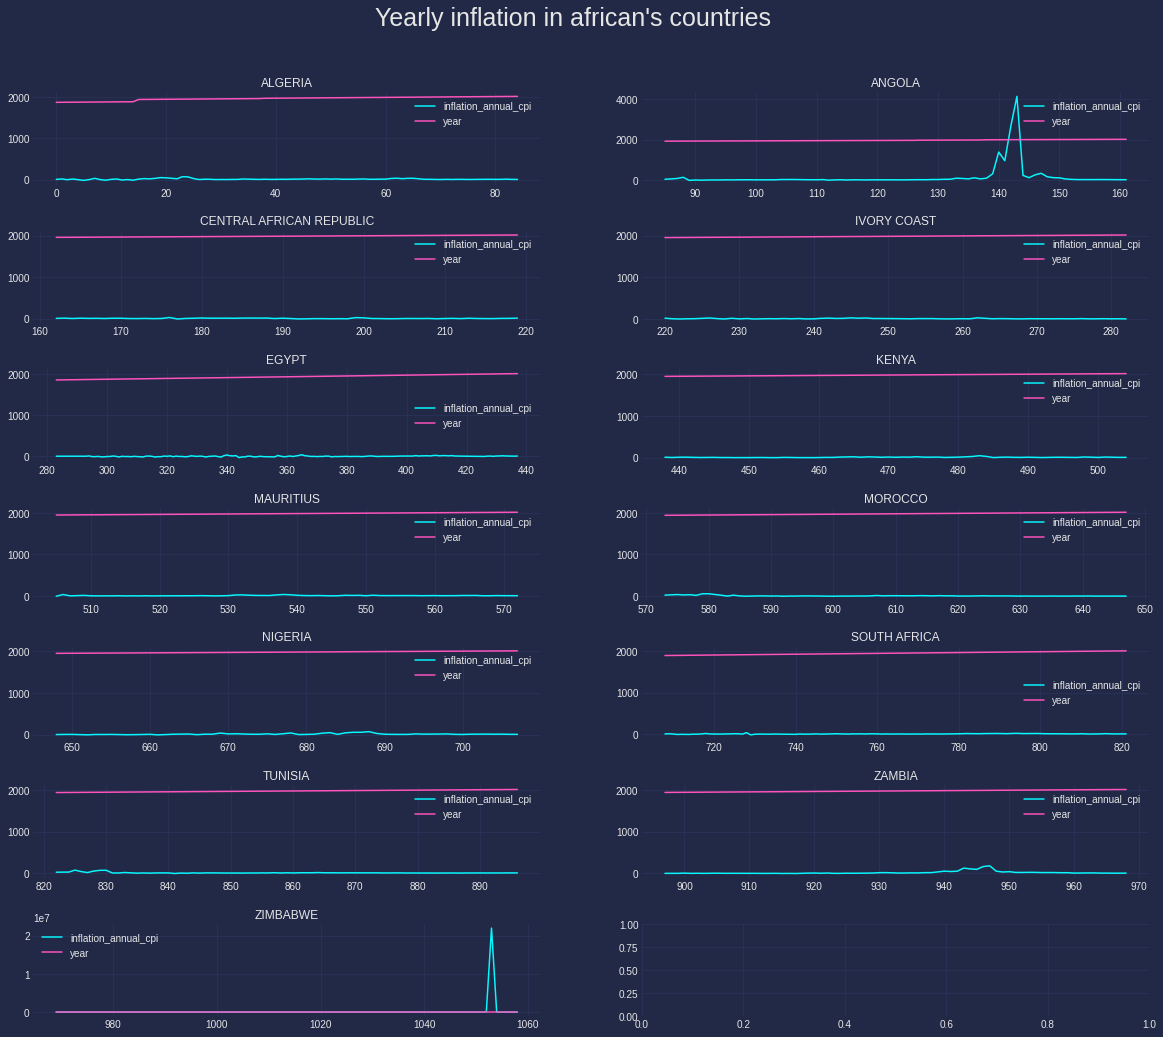

In [ ]:
# define subplot grid
import matplotlib.pyplot as plt
import mplcyberpunk
countries =data.country.unique()
inf = [data.country , data.inflation_annual_cpi]
plt.style.use('cyberpunk')
fig, axs = plt.subplots(round(data.country.nunique() /2)+1, 2, figsize=(20, 17))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Yearly inflation in african's countries", fontsize=25, y=0.95)

# loop through tickers and axes
for countr, ax in zip(countries, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df.loc[df["country"] == countr ].plot(ax=ax )

    # chart formatting
    ax.set_title(countr.upper())
    ax.set_xlabel("")

plt.show()

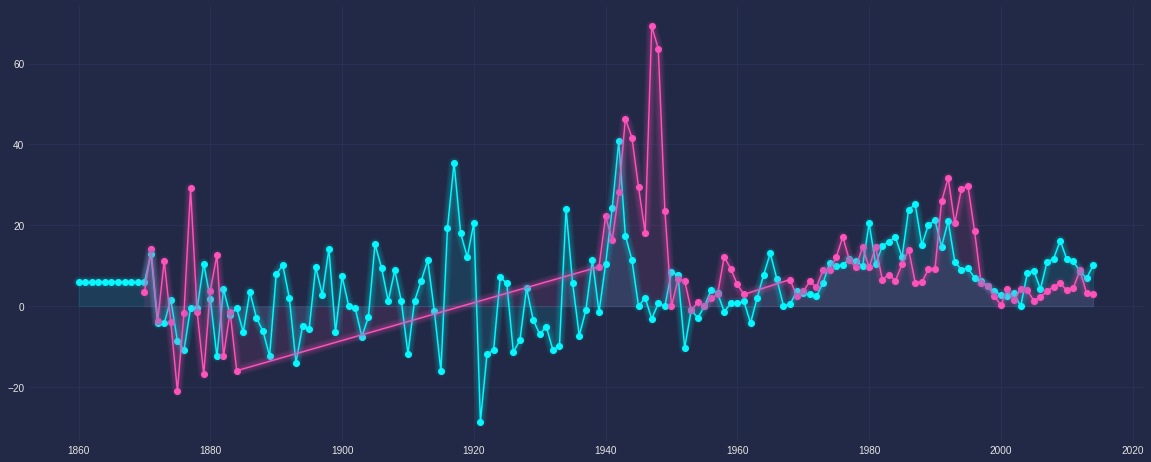

In [ ]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')
plt.figure(figsize = (20,8))
plt.plot(data.loc[data.country=='Egypt'].year,data.loc[data.country=='Egypt'].inflation_annual_cpi, marker = 'o')
plt.plot(data.loc[data.country=='Algeria'].year,data.loc[data.country=='Algeria'].inflation_annual_cpi, marker = 'o')
mplcyberpunk.add_glow_effects()
plt.show()

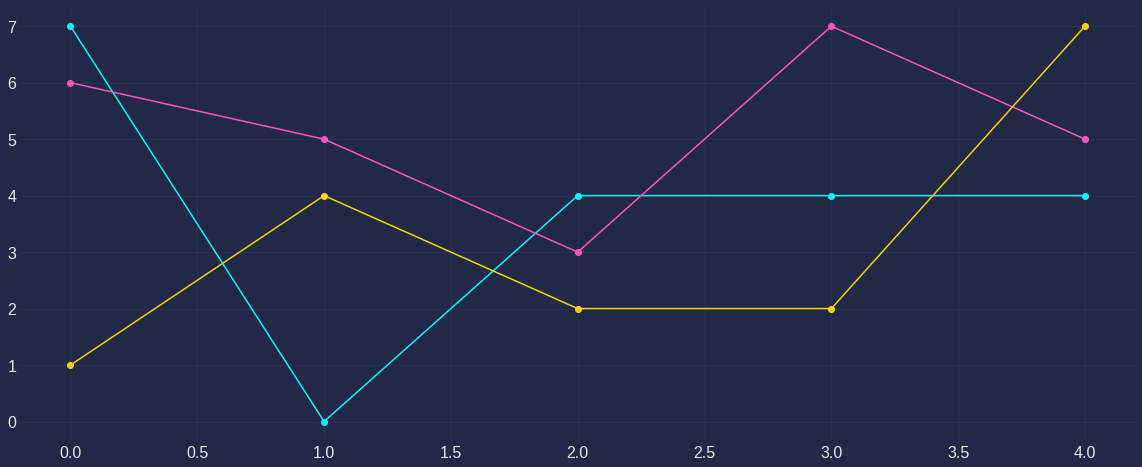

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(np.random.randint(0, 8, 5), marker = 'o', )
plt.plot(np.random.randint(0, 8, 5), marker = 'o')
plt.plot(np.random.randint(0, 8, 5), marker = 'o')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()

In [ ]:
! pip install jupyter_dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.3 MB/s 
     |████████████████████████████████| 1.6 MB 39.0 MB/s 


In [ ]:
 from jupyter_dash import JupyterDash
 import dash_core_components as dcc
 import dash_html_components as html
 from dash.dependencies import Input, Output 

In [ ]:
 fig = px.histogram(data,x='banking_crisis',color='banking_crisis',template='plotly_dark',color_discrete_map={'crisis':'red','no_crisis':'Blue'})
 fig.update_layout(
     font=dict(
        family="Courier New, monospace",
        size=18,
        color="white"
    ))
 
 # build jupyter dash app 
 app = JupyterDash(__name__)
 # add html components and figure to app
 app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
 app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

We notice here that the occurency of crisis in africa in the period 1860-214.

In [ ]:
fig =px.line(data.sort_values(by='year'),x='year',y='inflation_annual_cpi',animation_frame='country',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Annual inflation rate over Years')
fig.update_traces(showlegend=False)

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

In [ ]:
fig=px.line(data.sort_values(by='year'),x='year',y='exch_usd',animation_frame='country',labels={'exch_usd':'exchange rate usd'},animation_group='year',color='country',markers=True,template='plotly_dark',title='<b> Country wise Exchange Rate over Years')
fig.update_traces(showlegend=False)

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

In [ ]:
fig = px.bar(data,x='country',y='inflation_annual_cpi',color='inflation_annual_cpi',animation_frame='year',text='inflation_annual_cpi',labels={'inflation_annual_cpi':'cpi inflation rate'},animation_group='country',template='plotly_dark',title='<b> Inflation rate in every countries')

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

In [ ]:
fig=px.choropleth(data.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'exch_usd':'exchange rate usd','cc3':'code','country':'country'},animation_group='country',color='exch_usd',color_continuous_scale=px.colors.sequential.Plasma,title='<b>Exchange Rate of countries in Africa continent',template='plotly_dark')

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

In [ ]:
fig=px.choropleth(data.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_annual_cpi':'cpi inflation rate','cc3':'code','country':'country'},animation_group='country',color='inflation_annual_cpi',color_continuous_scale=px.colors.sequential.thermal,title='<b>Annual inflation rate of countries in Africa continent',template='plotly_dark')

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

In [ ]:
fig = px.choropleth(data.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'currency_crises':'currency_crises','cc3':'code','country':'country'},animation_group='country',color='currency_crises',title='<b>Currency Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline') 

In [ ]:
fig=px.choropleth(data.sort_values(by='year'),locations='cc3',animation_frame='year',labels={'inflation_crises':'inflation_crises','cc3':'code','country':'country'},animation_group='country',color='inflation_crises',title='<b>Inflation Crises of countries in Africa continent',color_continuous_scale=px.colors.sequential.Bluered,template='plotly_dark')

app.layout = html.Div([dcc.Graph(figure=fig)])
app.run_server(mode='inline')

In [ ]:
df_bk=data.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=le.fit_transform(data[col])

In [ ]:
x=data.drop('banking_crisis',axis=1)
y=data['banking_crisis']

In [ ]:
sns.countplot(data['banking_crisis'])
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy=0.15)
x_over,y_over=oversample.fit_resample(x,y)
print(x_over)
print(y_over)

In [ ]:
sns.countplot(y_over)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [ ]:
a={'Model Name':[],'True Positive':[],'False Negative':[],'False Positive':[],'True Negative':[],'Accuracy':[],'Precision':[],'Recall':[],'F1 Score':[],'Specificity':[],'MCC':[],'ROC_AUC_Score':[],'Balanced Accuracy':[]}
result=pd.DataFrame(a)
result

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1,n_estimators=100, subsample=1.0,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None,random_state=None,max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

 
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN, ModelSVM, modelBAG,ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    import math
    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', 'MCC')

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive' : tp, 
               'False Negative' : fn, 
               'False Positive' : fp,
               'True Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    result = result.append(new_row, ignore_index=True)

In [ ]:
result

In [ ]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

In [ ]:
models={'models':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','KNeighborsClassifier','SVC','BaggingClassifier','GradientBoostingClassifier','LGBMClassifier','GaussianNB']}
out=pd.DataFrame(models)
out['Accuracy']=result['Accuracy']
out['Precision']=result['Precision']
out['Recall']=result['Recall']
out['F1 Score']=result['F1 Score']
out['True Positive']=result['True Positive']
out['False Negative']=result['False Negative']
out['False Positive']=result['False Positive']
out['True Negative']=result['True Negative']
out.sort_values(by=['Accuracy','F1 Score','Recall','Precision'],ascending=False,inplace=True)
out.reset_index(drop=True,inplace=True)
out

### From the above results, the top model is Support Vector Classifier

In [ ]:
y_pred=ModelSVM.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=df_bk.merge(out,left_index=True,right_index=True)
out['actual'].replace(1,'no_crisis',inplace=True)
out['actual'].replace(0,'crisis',inplace=True)
out['predicted'].replace(1,'no_crisis',inplace=True)
out['predicted'].replace(0,'crisis',inplace=True)
out[['country','year','banking_crisis','predicted']].sample(10)